In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import warnings
from secret import path
warnings.filterwarnings("ignore")

In [2]:
main_df = pd.read_csv(path+"\\creditcard.csv")
main_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
(main_df[main_df.columns].isnull().sum()/main_df.shape[0])*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [10]:
X = main_df[main_df.columns[1:-2]]
y = pd.DataFrame(main_df['Class'])

In [11]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Train the k-NN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Calculate accuracy on the test set with all features
y_pred_all_features = knn_classifier.predict(X_test.values)
accuracy_all_features = accuracy_score(y_test, y_pred_all_features)

# Initialize variables to store feature importances
feature_importances = []

# Iterate through each feature and calculate accuracy without it
for feature in X.columns:
    # Create a copy of the training data with the current feature removed
    X_train_no_feature = X_train.drop(columns=[feature])
    X_test_no_feature = X_test.drop(columns=[feature])
    
    # Train a k-NN classifier without the current feature
    knn_classifier_no_feature = KNeighborsClassifier(n_neighbors=5)
    knn_classifier_no_feature.fit(X_train_no_feature, y_train)
    
    # Calculate accuracy on the test set without the current feature
    y_pred_no_feature = knn_classifier_no_feature.predict(X_test_no_feature.values)
    accuracy_no_feature = accuracy_score(y_test, y_pred_no_feature)
    
    # Calculate feature importance as the drop in accuracy
    feature_importance = accuracy_all_features - accuracy_no_feature
    feature_importances.append((feature, feature_importance))

# Sort features by importance in descending order
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Select the top-k most important features (e.g., top 10)
top_k_features = [feature for feature, _ in feature_importances[:10]]

# Print the top-k most important features
print(f'Top {len(top_k_features)} most important features:')
for feature, importance in feature_importances[:10]:
    print(f'{feature}: {importance:.4f}')

Top 10 most important features:
V14: 0.0001
V2: 0.0000
V12: 0.0000
V16: 0.0000
V3: 0.0000
V13: 0.0000
V4: 0.0000
V5: 0.0000
V6: 0.0000
V7: 0.0000


In [37]:
top_k_features
X_test_selected_knn = X_test[top_k_features]

In [38]:
X_train_selected_knn = X_train[top_k_features]
knn_classifier.fit(X_train_selected_knn, y_train)
y_pred = knn_classifier.predict(X_test_selected_knn)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
clr = classification_report(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", clr)

Accuracy: 0.9995531296881484
Precision: 0.9022556390977443
Recall: 0.8053691275167785
F1 Score: 0.8510638297872339
Confusion Matrix:
 [[93825    13]
 [   29   120]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.90      0.81      0.85       149

    accuracy                           1.00     93987
   macro avg       0.95      0.90      0.93     93987
weighted avg       1.00      1.00      1.00     93987



In [30]:
X = main_df[main_df.columns[1:-2]]
y = main_df['Class']

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X, y)

feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_influential_features_rf = feature_importance_df['Feature'][:10].tolist()

# selected_features_combined = list(set(top_influential_features_ttest).union(top_influential_features_rf))
selected_features_combined = top_influential_features_rf

# Extract the selected features from your dataset
X_train_selected = X_train[selected_features_combined]
X_test_selected = X_test[selected_features_combined]

# Model Training and Evaluation
# 1. Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train_selected, y_train)
y_pred_rf = rf_model.predict(X_test_selected)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Print the results
print("Random Forest Model:")
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("Classification Report:\n", classification_report_rf)

Random Forest Model:
Accuracy: 0.9996382478427868
Confusion Matrix:
 [[93832     6]
 [   28   121]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.95      0.81      0.88       149

    accuracy                           1.00     93987
   macro avg       0.98      0.91      0.94     93987
weighted avg       1.00      1.00      1.00     93987



In [32]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
clr = classification_report(y_test, y_pred_rf)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9996382478427868
Precision: 0.952755905511811
Recall: 0.8120805369127517
F1 Score: 0.8768115942028987


In [34]:
print("Top Features with KNearestNeighbor:", top_k_features)
print("Top Features with Random Forest:", selected_features_combined)

Top Features with KNearestNeighbor: ['V14', 'V2', 'V12', 'V16', 'V3', 'V13', 'V4', 'V5', 'V6', 'V7']
Top Features with Random Forest: ['V17', 'V14', 'V12', 'V10', 'V16', 'V11', 'V18', 'V9', 'V7', 'V4']


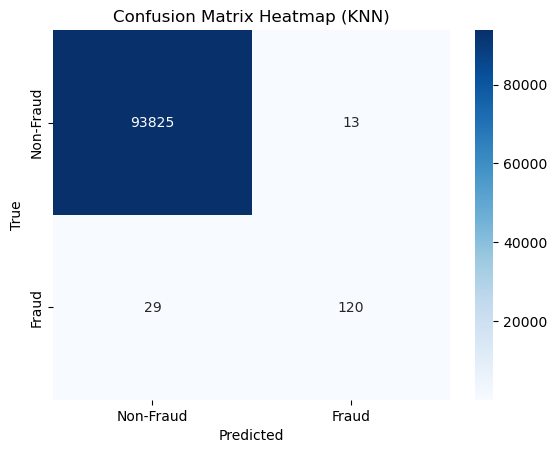

In [36]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (KNN)')
plt.show()

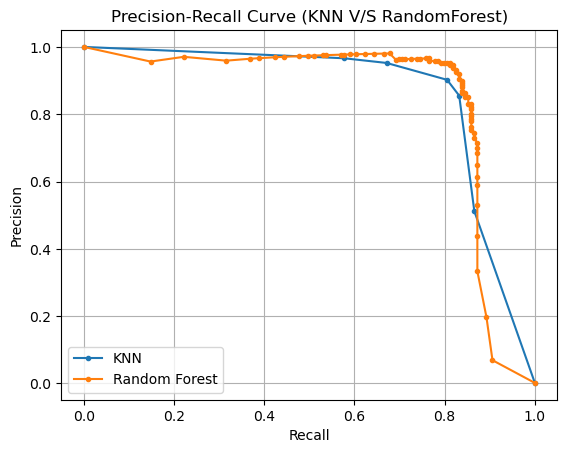

In [44]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for the positive class (fraudulent)
y_scores_knn = knn_classifier.predict_proba(X_test_selected_knn)[:, 1]
y_scores_rf = rf_model.predict_proba(X_test_selected)[:, 1]

# Calculate precision and recall for various thresholds
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, y_scores_knn)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_scores_rf)
# Plot the precision-recall curve
plt.plot(recall_knn, precision_knn, marker='.', label="KNN")
plt.plot(recall_rf, precision_rf, marker='.', label="Random Forest")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (KNN V/S RandomForest)')
plt.grid(True)
plt.legend()
plt.show()